In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
%matplotlib inline

In [11]:
dataset = pd.read_csv("C:/Users/Long Nguyen/Box/My folder/Project/Soccer/Fifa20data.csv")

## Select Data

In [12]:
dataset.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [13]:
#Here I only pick data with numerical values that I think would be good indicators
data = dataset[['short_name', 'age', 'height_cm', 'weight_kg','overall','potential',
               'weak_foot','skill_moves',
               'pace','shooting','value_eur','wage_eur',
               'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
               'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
               'gk_positioning', 'attacking_crossing', 'attacking_finishing',
               'attacking_heading_accuracy', 'attacking_short_passing',
               'attacking_volleys', 'skill_dribbling', 'skill_curve',
               'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
               'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
               'movement_reactions', 'movement_balance', 'power_shot_power',
               'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
               'mentality_aggression', 'mentality_interceptions',
               'mentality_positioning', 'mentality_vision', 'mentality_penalties',
               'mentality_composure', 'defending_marking', 'defending_standing_tackle',
               'defending_sliding_tackle', 'goalkeeping_diving',
               'goalkeeping_handling', 'goalkeeping_kicking',
               'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [14]:
data.head()

,short_name,age,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,4,4,87.0,92.0,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,4,5,90.0,93.0,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,5,5,91.0,85.0,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,3,1,NaN,NaN,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,4,4,91.0,83.0,...,88,91,34,27,22,11,12,6,8,8


In [15]:
data = data[data.overall>85]

data = data.fillna(value=0)

In [16]:
names = data.short_name.tolist()

data = data.drop(['short_name'], axis = 1)

data.head()

,age,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,value_eur,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,4,4,87.0,92.0,95500000,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,4,5,90.0,93.0,58500000,...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,5,5,91.0,85.0,105500000,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,3,1,0.0,0.0,77500000,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,4,4,91.0,83.0,90000000,...,88,91,34,27,22,11,12,6,8,8


## Rescaling the players attributes

In [17]:
from sklearn import preprocessing

x = data.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
data_scaled = pd.DataFrame(x_scaled)

## Hierarchical Clustering with Average Linkage

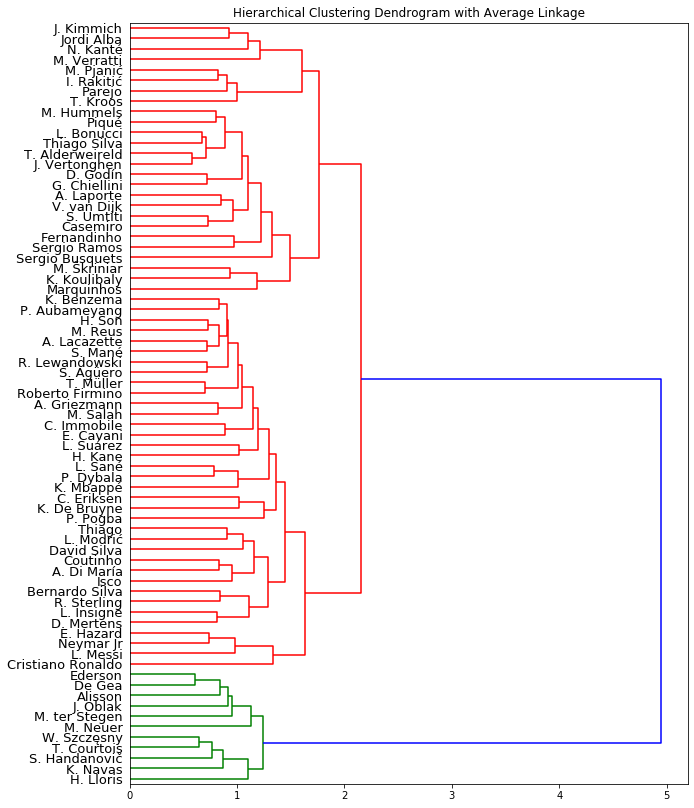

In [19]:
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')

dendrogram = sch.dendrogram(sch.linkage(data_scaled, method="average"),
                            labels= names, leaf_font_size = 13, orientation='right')

## Hierarchical Clustering with Single Linkage

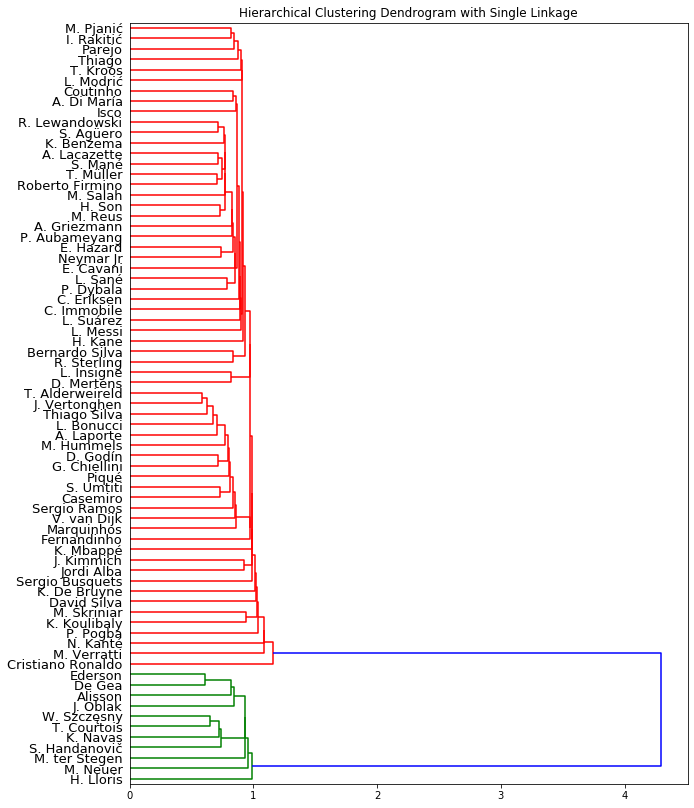

In [20]:
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Single Linkage')

dendrogram = sch.dendrogram(sch.linkage(data_scaled, method="single"),
                            labels= names, leaf_font_size = 13, orientation='right')

## Hierarchical Clustering with Centroid Linkage

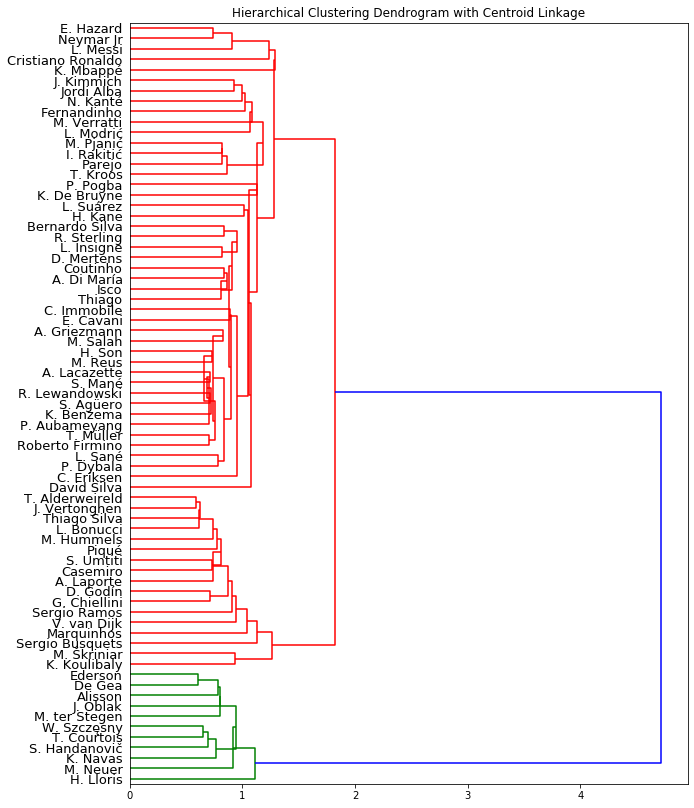

In [21]:
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Centroid Linkage')

dendrogram = sch.dendrogram(sch.linkage(data_scaled, method="centroid"),
                            labels= names, leaf_font_size = 13, orientation='right')

## Hierarchical Clustering with Complete Linkage

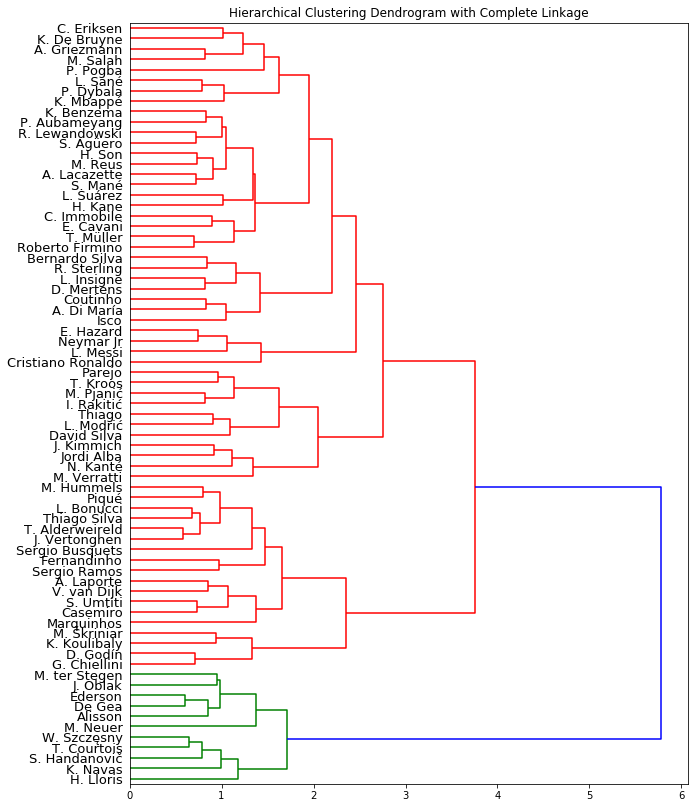

In [22]:
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')

dendrogram = sch.dendrogram(sch.linkage(data_scaled, method="complete"),
                            labels= names, leaf_font_size = 13, orientation='right')